# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [9]:
df = pd.read_csv('demo01_tratado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   sexo                                    16650 non-null  int64  
 2   posse_de_veiculo                        16650 non-null  int64  
 3   posse_de_imovel                         16650 non-null  int64  
 4   qtd_filhos                              16650 non-null  int64  
 5   idade                                   16650 non-null  float64
 6   tempo_emprego                           16650 non-null  float64
 7   possui_celular                          16650 non-null  int64  
 8   possui_fone_comercial                   16650 non-null  int64  
 9   possui_fone                             16650 non-null  int64  
 10  possui_email                            16650 non-null  in

In [10]:
y = df['mau']

In [11]:
X = df.drop('mau', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
# 1, 2
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

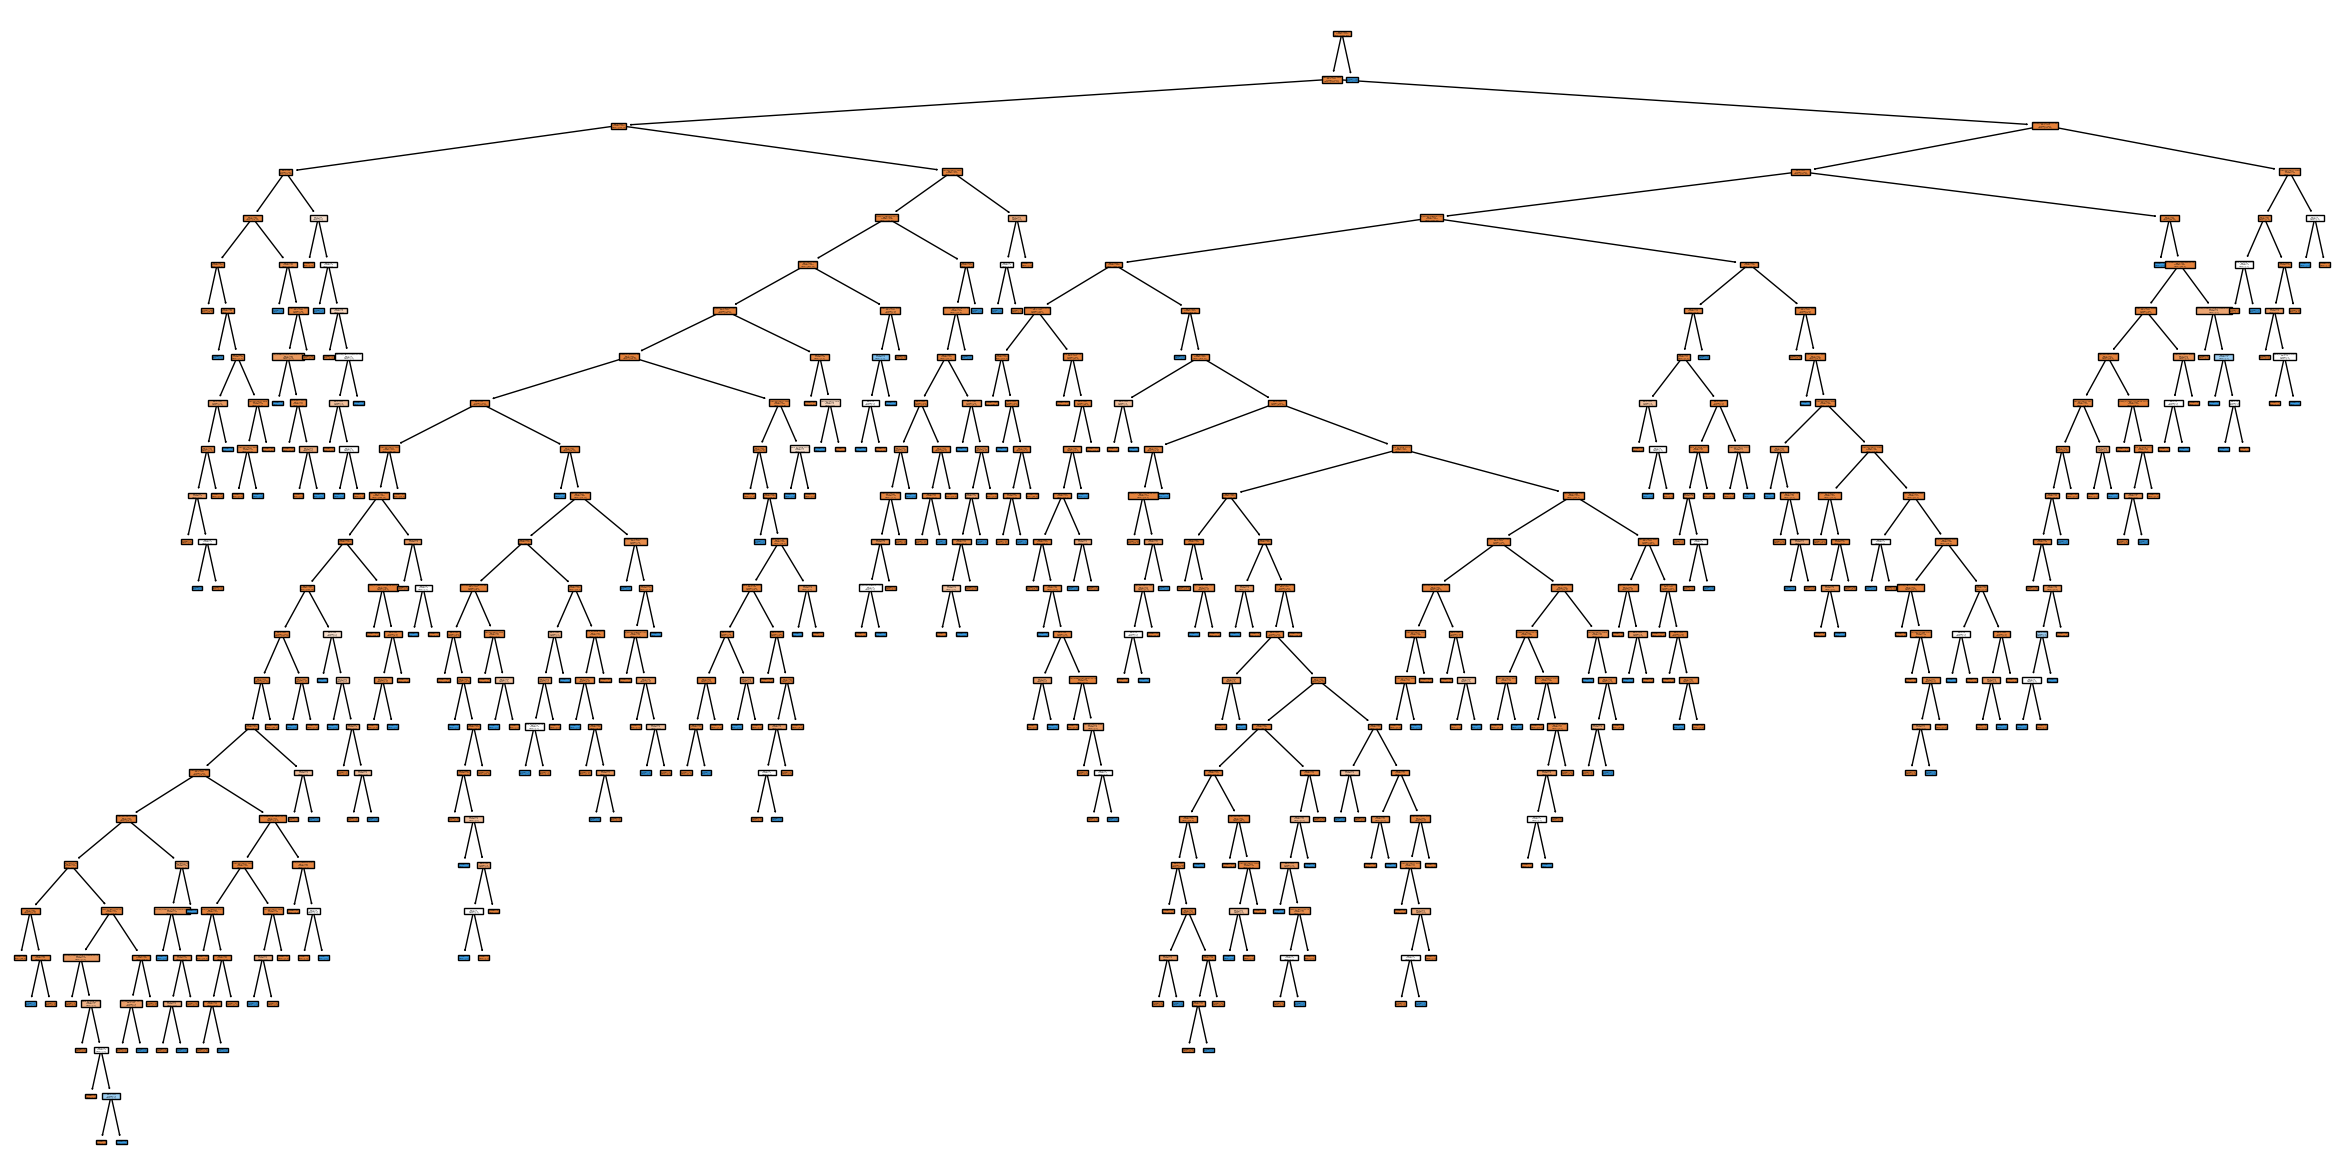

In [25]:
# 3
plt.figure(figsize=(30, 15))
plot_tree(clf,
          filled=True,
          #class_names=['Mau', 'Bom'],
          feature_names=list(X_train.columns));

In [39]:
# 4
y_train_pred = clf.predict(X_train)

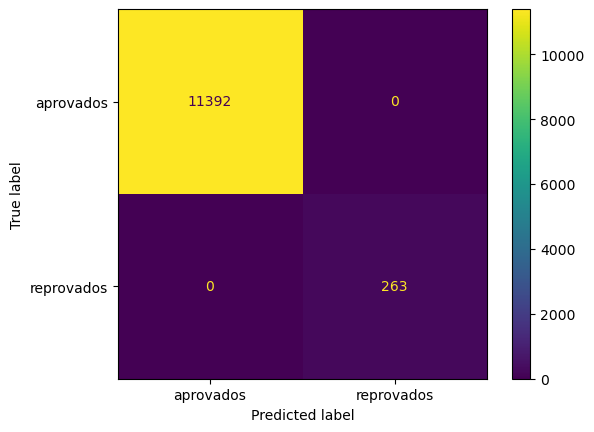

In [40]:
cm = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['aprovados', 'reprovados'])
disp.plot()

plt.show()

In [43]:
# 5
accuracy_score(y_train, y_train_pred)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [22]:
# 1
predictions = clf.predict(X_test)

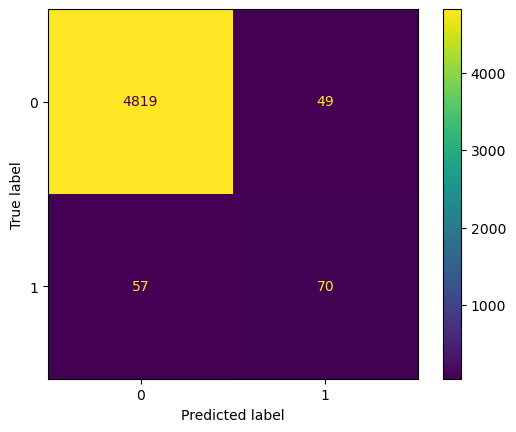

In [27]:
# 2
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

In [24]:
# 3
accuracy_score(y_test, predictions)

0.9787787787787787

In [44]:
# 4
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,random_state=123)

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [46]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9851851851851852

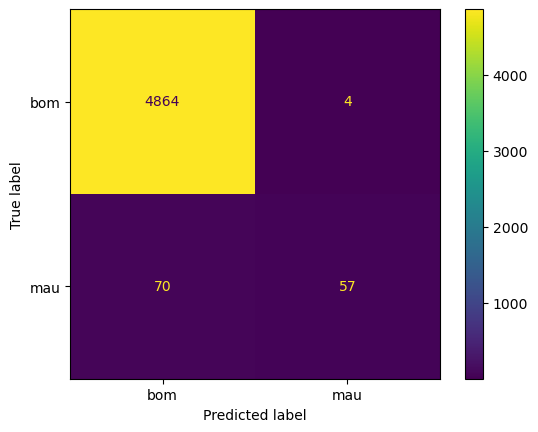

In [47]:
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['bom', 'mau'])
disp.plot()

plt.show()

In [48]:
# a proporcao de predicao foi de 57 do total de 127 que são considerados "mau", aproximadamente 0.44
57 / 127

0.44881889763779526

In [50]:
# 5
y_test.value_counts()

mau
0    4868
1     127
Name: count, dtype: int64

In [51]:
len(y_test)

4995

In [57]:
zeros = [0 for i in range(1,4996)]

In [58]:
len(zeros)

4995

In [59]:
y_tudo_bom = pd.DataFrame(zeros)

In [61]:
# se todos fossem classificados como "bom", e fosse feito o calculo do accuracy esse seria o valor
accuracy_score(y_test,y_tudo_bom)

0.9745745745745745